In [1]:
from pymongo import MongoClient
import pandas as pd
import time

In [2]:
client = MongoClient("localhost:27017")

In [3]:
client.list_database_names()

['Ironhack', 'admin', 'config', 'local']

In [4]:
db = client["Ironhack"]

In [5]:
c = db.get_collection("companies")

In [6]:
c

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ironhack'), 'companies')

In [7]:
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [8]:
c.distinct("offices")[0]

{'description': None,
 'address1': None,
 'address2': None,
 'zip_code': None,
 'city': None,
 'state_code': None,
 'country_code': 'CAN',
 'latitude': 56.130366,
 'longitude': -106.346771}

In [9]:
c.distinct("total_money_raised")

['$0',
 '$1.01M',
 '$1.02M',
 '$1.03M',
 '$1.04M',
 '$1.05M',
 '$1.06B',
 '$1.08M',
 '$1.09M',
 '$1.11M',
 '$1.13M',
 '$1.14M',
 '$1.15B',
 '$1.15M',
 '$1.16B',
 '$1.17M',
 '$1.19M',
 '$1.1B',
 '$1.1M',
 '$1.21M',
 '$1.23M',
 '$1.25M',
 '$1.27M',
 '$1.2B',
 '$1.2M',
 '$1.31M',
 '$1.32M',
 '$1.33M',
 '$1.35M',
 '$1.36M',
 '$1.3M',
 '$1.42M',
 '$1.44M',
 '$1.45M',
 '$1.46M',
 '$1.4M',
 '$1.51M',
 '$1.53M',
 '$1.55M',
 '$1.56M',
 '$1.57M',
 '$1.58M',
 '$1.5M',
 '$1.61M',
 '$1.62M',
 '$1.63M',
 '$1.65M',
 '$1.66M',
 '$1.67M',
 '$1.68M',
 '$1.69M',
 '$1.6M',
 '$1.71M',
 '$1.72M',
 '$1.73M',
 '$1.75M',
 '$1.77B',
 '$1.77M',
 '$1.7M',
 '$1.81M',
 '$1.82M',
 '$1.83M',
 '$1.84M',
 '$1.8M',
 '$1.92M',
 '$1.94M',
 '$1.95M',
 '$1.96M',
 '$1.97M',
 '$1.98M',
 '$1.99M',
 '$1.9M',
 '$10.1M',
 '$10.2M',
 '$10.3M',
 '$10.4M',
 '$10.5M',
 '$10.6M',
 '$10.7M',
 '$10.8M',
 '$10.9M',
 '$100M',
 '$100k',
 '$101M',
 '$101k',
 '$102M',
 '$103M',
 '$104M',
 '$105M',
 '$105k',
 '$106M',
 '$107M',
 '$108M',
 '$1

In [10]:
c.distinct("category_code")

[None,
 'advertising',
 'analytics',
 'automotive',
 'biotech',
 'cleantech',
 'consulting',
 'design',
 'ecommerce',
 'education',
 'enterprise',
 'fashion',
 'finance',
 'games_video',
 'government',
 'hardware',
 'health',
 'hospitality',
 'legal',
 'local',
 'manufacturing',
 'medical',
 'messaging',
 'mobile',
 'music',
 'nanotech',
 'network_hosting',
 'news',
 'nonprofit',
 'other',
 'photo_video',
 'public_relations',
 'real_estate',
 'search',
 'security',
 'semiconductor',
 'social',
 'software',
 'sports',
 'transportation',
 'travel',
 'web']

In [11]:
condition1={"total_money_raised":  {"$regex": "M$"}}
condition2={"tag_list": {"$regex": "design"}}
condition3={"category_code": "design"}

query = {"$and": [condition1,{"$or": [condition2, condition3]}]}
projection={"name":1, "_id":0, "total_money_raised":1, 
            "tag_list":1, "description":1, "offices":1, "category_code":1 }

design_companies=list(c.find(query, projection).sort('offices.country_code'))

In [12]:
df=pd.DataFrame(design_companies)
df.sample()

,name,category_code,tag_list,description,total_money_raised,offices
10,Digg,news,"community, social, news, bookmark, digg, techn...",user driven social content website,$45M,"[{'description': None, 'address1': '135 Missis..."


In [13]:
df.iloc[4]["offices"]

[{'description': 'Registered Office',
  'address1': '178-180 Hotwell Road',
  'address2': '',
  'zip_code': 'BS8 4RP',
  'city': 'Bristol',
  'state_code': None,
  'country_code': 'GBR',
  'latitude': None,
  'longitude': None},
 {'description': 'US Sales & Marketing',
  'address1': '2225 East Bayshore Rd',
  'address2': 'Suite 200',
  'zip_code': '94303',
  'city': 'Palo Alto',
  'state_code': 'CA',
  'country_code': 'USA',
  'latitude': None,
  'longitude': None}]

In [14]:
df['city'] = df["offices"].apply(lambda x: x[0]['city'])
df['country_code'] = df["offices"].apply(lambda x: x[0]['country_code'])

In [15]:
df['state_code'] = df["offices"].apply(lambda x: x[0]['state_code'])
df['latitude'] = df["offices"].apply(lambda x: x[0]['latitude'])
df['longitude'] = df["offices"].apply(lambda x: x[0]['longitude'])

In [16]:
df['address1'] = df["offices"].apply(lambda x: x[0]['address1'])
df['address2'] = df["offices"].apply(lambda x: x[0]['address2'])
df['zip_code'] = df["offices"].apply(lambda x: x[0]['zip_code'])

In [17]:
df.drop("offices", axis=1, inplace=True)

In [18]:
df

,name,category_code,tag_list,description,total_money_raised,city,country_code,state_code,latitude,longitude,address1,address2,zip_code
0,Pumant,software,"software-development, programmers, designers, ...",None,$1.2M,Birmingham,GBR,None,52.482932,-1.893621,"Birmingham, UK",,
1,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,San Francisco,USA,CA,37.795531,-122.400598,447 Battery St.,3rd Floor,94111
2,Sitemasher,enterprise,"website-design-and-management-platform, saas",,C$5M,Vancouver,CAN,None,NaN,NaN,Suite 200,326 West 5th Avenue,V5Y1J5
3,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,Kaiserslautern,DEU,None,49.455996,7.806852,Europaallee 10,,67657
4,Gnodal,network_hosting,"design, infrastructure, systems",High Performance Datacenter,$2.19M,Bristol,GBR,None,NaN,NaN,178-180 Hotwell Road,,BS8 4RP
5,Moonfruit,design,,,$2.25M,London,GBR,None,NaN,NaN,,,
6,EasyLink,network_hosting,"easylink, india, web-design, web-application-d...",None,$5.4M,Chennai,IND,None,NaN,NaN,"C-Block, 1st floor, Bharathiar Complex","100 feet road, Vadapalani",600028
7,Wix,web,"website, widget, design, flash, internet",Drag-and-Drop Web Publishing Platform,$58.5M,Tel Aviv,ISR,None,NaN,NaN,,,
8,DoNanza,web,"freelance, search, freelance-jobs, freelance-t...",Freelance jobs search and tools,$1M,Tel Aviv,ISR,None,NaN,NaN,Gruzenberg Str.,,67448
9,Access Point,advertising,"web-design, web-development, logo-design, bran...",,$4.5M,Iasi,ROM,None,NaN,NaN,Socola 134a,,700187


In [19]:
df['state_code'].value_counts()

state_code
CA    10
NY     4
FL     2
IL     2
WA     1
DC     1
Name: count, dtype: int64

In [20]:
df['city'].value_counts()

city
San Francisco     3
Tel Aviv          2
New York          2
Birmingham        1
Santa Clara       1
Warrenville       1
Washington        1
Palo Alto         1
Brooklyn          1
Lisle             1
Seattle           1
Mountain View     1
St Petersburg     1
Milpitas          1
Los Angeles       1
Hollywood         1
NY                1
Los Altos         1
Iasi              1
Chennai           1
London            1
Bristol           1
Kaiserslautern    1
Vancouver         1
Orlando           1
Name: count, dtype: int64

In [21]:
df.to_csv("../dataframes/design_companies.csv", index=False)

C:\Users\pagob\AppData\Local\Temp\ipykernel_22716\2452846107.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels())


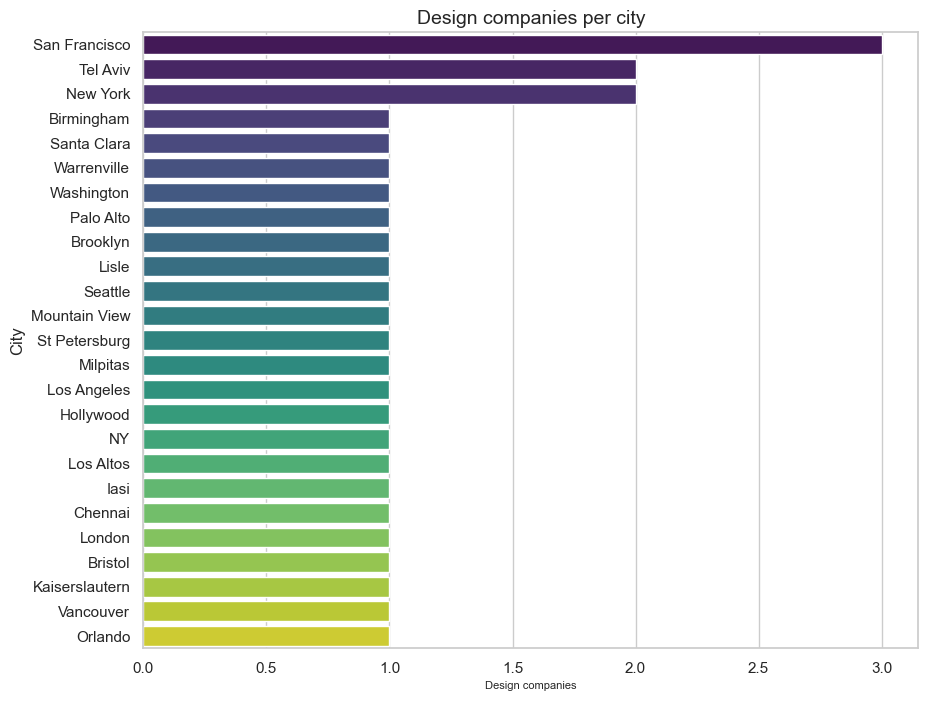

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Get the city counts
city_counts = df['city'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
bar_plot.set_xticklabels(bar_plot.get_xticklabels())

# Set the labels and title
plt.xlabel('Design companies', fontsize=8)
plt.ylabel('City', fontsize=12)
plt.title('Design companies per city', fontsize=14)

# Show and save the graph
plt.savefig('../figures/design_cities.png')
plt.show()

In [23]:
ondition1={"total_money_raised":  {"$regex": "M$"}}
condition2={"description": {"$regex": "gam"}}
condition3={"category_code": "games-video"}

query = {"$and": [condition1,{"$or": [condition2, condition3]}]}
projection={"name":1, "_id":0, "total_money_raised":1, 
            "tag_list":1, "description":1, "offices":1, "category_code":1 }

gaming_money_raised=list(c.find(query, projection))

In [24]:
df2=pd.DataFrame(gaming_money_raised)
df2.sample()

,name,category_code,tag_list,description,total_money_raised,offices
3,OMGPOP,games_video,"dating, gaming, auction",Free online multiplayer game,$16.6M,"[{'description': '', 'address1': 'SoHo', 'addr..."


In [25]:
len(gaming_money_raised)

51

In [26]:
df2['total_money_raised']

0       $12M
1     $44.7M
2     $10.5M
3     $16.6M
4     $3.97M
5        $3M
6     $46.3M
7       $84M
8     $37.7M
9     $14.5M
10    $23.3M
11     $860M
12     $5.8M
13     $9.5M
14       $7M
15    $17.1M
16     $1.9M
17      $21M
18    $5.92M
19    $82.8M
20    $5.23M
21    €2.75M
22    $15.5M
23    $76.6M
24    $5.55M
25       $1M
26      $15M
27       $6M
28     $4.5M
29       $8M
30       $6M
31       $2M
32    $7.26M
33     $7.5M
34     $7.5M
35    $25.5M
36       $1M
37     ¥464M
38      $59M
39    €1.75M
40      $80M
41    $7.66M
42      $19M
43     €1.5M
44    $8.25M
45     $1.5M
46    $40.8M
47       €3M
48       $7M
49    $3.86M
50     €420M
Name: total_money_raised, dtype: object

In [27]:
df2['currency'] = ''
# Iterate over the rows and update the 'currency' column based on the symbols
for index, row in df2.iterrows():
    if '€' in row['total_money_raised']:
        df2.at[index, 'currency'] = '€'
    elif '$' in row['total_money_raised']:
        df2.at[index, 'currency'] = '$'
    elif '¥' in row['total_money_raised']:
        df2.at[index, 'currency'] = '¥'

In [28]:

import re

# Remove non-numeric elements from the 'total_money_raised' column
df2['total_money_raised'] = df2['total_money_raised'].str.replace(r'\D', '', regex=True)


In [29]:
df2['total_money_raised']

0      12
1     447
2     105
3     166
4     397
5       3
6     463
7      84
8     377
9     145
10    233
11    860
12     58
13     95
14      7
15    171
16     19
17     21
18    592
19    828
20    523
21    275
22    155
23    766
24    555
25      1
26     15
27      6
28     45
29      8
30      6
31      2
32    726
33     75
34     75
35    255
36      1
37    464
38     59
39    175
40     80
41    766
42     19
43     15
44    825
45     15
46    408
47      3
48      7
49    386
50    420
Name: total_money_raised, dtype: object

In [30]:
df2['currency']

0     $
1     $
2     $
3     $
4     $
5     $
6     $
7     $
8     $
9     $
10    $
11    $
12    $
13    $
14    $
15    $
16    $
17    $
18    $
19    $
20    $
21    €
22    $
23    $
24    $
25    $
26    $
27    $
28    $
29    $
30    $
31    $
32    $
33    $
34    $
35    $
36    $
37    ¥
38    $
39    €
40    $
41    $
42    $
43    €
44    $
45    $
46    $
47    €
48    $
49    $
50    €
Name: currency, dtype: object

In [31]:
df2['total_money_raised'] = df2['total_money_raised'].astype(float)

In [32]:
for index, row in df2.iterrows():
    if row["currency"] == "€":
        df2.at[index, 'total_money_raised'] *= 1.2
    elif row["currency"] == "¥":
        df2.at[index, 'total_money_raised'] *= 0.0074

In [33]:
df2['total_money_raised'] =df2['total_money_raised'].round(1)
df2['total_money_raised'] 

0      12.0
1     447.0
2     105.0
3     166.0
4     397.0
5       3.0
6     463.0
7      84.0
8     377.0
9     145.0
10    233.0
11    860.0
12     58.0
13     95.0
14      7.0
15    171.0
16     19.0
17     21.0
18    592.0
19    828.0
20    523.0
21    330.0
22    155.0
23    766.0
24    555.0
25      1.0
26     15.0
27      6.0
28     45.0
29      8.0
30      6.0
31      2.0
32    726.0
33     75.0
34     75.0
35    255.0
36      1.0
37      3.4
38     59.0
39    210.0
40     80.0
41    766.0
42     19.0
43     18.0
44    825.0
45     15.0
46    408.0
47      3.6
48      7.0
49    386.0
50    504.0
Name: total_money_raised, dtype: float64

In [34]:
df2 = df2.sort_values('total_money_raised',ascending=False)
df2 = df2.reset_index(drop=True)
df2

,name,category_code,tag_list,description,total_money_raised,offices,currency
0,Zynga,games_video,"facebookapplications, games, socialnetworking,...",Network of gaming applications,860.0,"[{'description': 'SF HQ', 'address1': '365 Ver...",$
1,Realtime Worlds,games_video,games,"Entertainment software, Videogames",828.0,"[{'description': None, 'address1': '', 'addres...",$
2,Crispy Gamer,games_video,"videogaming, community, editorial, the-game-tr...",videogame review community,825.0,"[{'description': '', 'address1': '35 West 36th...",$
3,Aurora Feint,games_video,,games and platforms for iPhone,766.0,"[{'description': 'HQ', 'address1': '330 Primro...",$
4,Turbine,games_video,"game, online-games, social-gaming, role-playin...",creates and operates online games,766.0,"[{'description': None, 'address1': '60 Glacier...",$
5,Atari,games_video,,video game software,726.0,"[{'description': 'HQ', 'address1': '417 Fifth ...",$
6,Pikum,games_video,"gaming, social-networks, first-round-capital, ...",Online betting game,592.0,"[{'description': None, 'address1': '7 Chalcot ...",$
7,Sometrics,games_video,"analytics, social-media, social-networking, ad...",In-game Payment Solutions,555.0,"[{'description': '', 'address1': '', 'address2...",$
8,Cellufun,games_video,cellufun,Mobile social gaming community,523.0,"[{'description': 'Worldwide HQ', 'address1': '...",$
9,Bigpoint,games_video,"online-games, browser-games, browsergames, bro...",developer and provider of online games,504.0,"[{'description': 'Bigpoint Headquarters', 'add...",€


In [35]:
df2["offices"][0][0]['city']

'San Francisco'

In [36]:
df2["offices"][4]


[{'description': None,
  'address1': '60 Glacier Drive, Suite 4000',
  'address2': '',
  'zip_code': '',
  'city': 'Westwood',
  'state_code': 'MA',
  'country_code': 'USA',
  'latitude': 42.214483,
  'longitude': -71.185964},
 {'description': '',
  'address1': '',
  'address2': '',
  'zip_code': '',
  'city': 'Redwood City',
  'state_code': 'CA',
  'country_code': 'USA',
  'latitude': 37.477652,
  'longitude': -122.223384}]

In [37]:
df2['city'] = ''

for index, row in df2.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        city = offices[i].get('city', '')  
        df2.at[index, 'city'] += (city + ' ,')

In [ ]:
df2['state_code'] = ''

for index, row in df2.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        city = offices[i].get('city', '')  
        df2.at[index, 'city'] += (city + ' ,')

In [38]:
df2

,name,category_code,tag_list,description,total_money_raised,offices,currency,city
0,Zynga,games_video,"facebookapplications, games, socialnetworking,...",Network of gaming applications,860.0,"[{'description': 'SF HQ', 'address1': '365 Ver...",$,"San Francisco , ,Baltimore ,Los Angeles ,"
1,Realtime Worlds,games_video,games,"Entertainment software, Videogames",828.0,"[{'description': None, 'address1': '', 'addres...",$,"Dundee ,Boulder ,"
2,Crispy Gamer,games_video,"videogaming, community, editorial, the-game-tr...",videogame review community,825.0,"[{'description': '', 'address1': '35 West 36th...",$,"New York ,"
3,Aurora Feint,games_video,,games and platforms for iPhone,766.0,"[{'description': 'HQ', 'address1': '330 Primro...",$,"Burlingame ,"
4,Turbine,games_video,"game, online-games, social-gaming, role-playin...",creates and operates online games,766.0,"[{'description': None, 'address1': '60 Glacier...",$,"Westwood ,Redwood City ,"
5,Atari,games_video,,video game software,726.0,"[{'description': 'HQ', 'address1': '417 Fifth ...",$,"New York ,"
6,Pikum,games_video,"gaming, social-networks, first-round-capital, ...",Online betting game,592.0,"[{'description': None, 'address1': '7 Chalcot ...",$,"London ,"
7,Sometrics,games_video,"analytics, social-media, social-networking, ad...",In-game Payment Solutions,555.0,"[{'description': '', 'address1': '', 'address2...",$,"El Segundo ,"
8,Cellufun,games_video,cellufun,Mobile social gaming community,523.0,"[{'description': 'Worldwide HQ', 'address1': '...",$,"New York ,"
9,Bigpoint,games_video,"online-games, browser-games, browsergames, bro...",developer and provider of online games,504.0,"[{'description': 'Bigpoint Headquarters', 'add...",€,"Hamburg ,San Francisco ,Berlin ,Ta 'Xbiex ,"
